In [434]:


import pandas as pd
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import matplotlib.pylab as plt
%matplotlib inline

In [435]:
df = pd.read_csv('dataset_test.csv')

In [436]:
df.head()

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
0,CNDT,0.0,NASDAQ,2021,12,10,15,30,792397,5.41,...,0.2,230000.0,-30000.0,1173839.5,1.313408e+09,-2.066295e+09,18.0,18.0,0.5781,NaN
1,CNDT,1.0,NASDAQ,2021,12,9,15,30,1134639,5.46,...,0.2,230000.0,-20000.0,1205795.2,-1.090610e+09,-4.850086e+07,18.0,18.0,0.8089,NaN
2,CNDT,2.0,NASDAQ,2021,12,8,15,30,939646,5.47,...,0.2,230000.0,-30000.0,1201770.2,-8.206629e+08,-1.021058e+09,18.0,18.0,0.6823,NaN
3,CNDT,3.0,NASDAQ,2021,12,7,15,30,1301257,5.51,...,0.2,230000.0,-30000.0,1197837.6,-4.582356e+08,1.865824e+09,18.0,18.0,0.9432,NaN
4,CNDT,4.0,NASDAQ,2021,12,6,15,30,1090706,5365.00,...,0.2,230000.0,-30000.0,1189088.3,-6.176610e+08,-1.852724e+09,18.0,18.0,0.7731,NaN


In [437]:
df.isnull().values.any()

True

In [438]:
df.isnull().sum().sum()

412620

In [439]:
df=df.dropna()

In [440]:
df


,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
21,CNDT,21.0,NASDAQ,2021,11,10,15,30,1276090,6168.0000,...,0.2,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0
22,CNDT,22.0,NASDAQ,2021,11,9,15,30,2271889,6.2000,...,0.2,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0
23,CNDT,23.0,NASDAQ,2021,11,8,15,30,1670784,6.3400,...,0.2,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0
24,CNDT,24.0,NASDAQ,2021,11,5,14,30,4124330,6.7400,...,0.2,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0
25,CNDT,25.0,NASDAQ,2021,11,4,14,30,1129657,7.2100,...,0.2,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98137,GRTS,197.0,NASDAQ,2021,3,3,15,30,667528,15.4400,...,2.0,1950000.0,-640000.0,3895445.0,-9.033747e+07,-3.837886e+07,18.0,18.0,0.1928,0.0
98138,GRTS,198.0,NASDAQ,2021,3,2,15,30,1160922,15.3700,...,1.9,1920000.0,-720000.0,3887184.3,2.389371e+08,-1.710095e+08,18.0,18.0,0.3695,0.0
98139,GRTS,199.0,NASDAQ,2021,3,1,15,30,378106,14.4000,...,1.9,1900000.0,-800000.0,3868451.0,-1.314554e+09,-6.220639e+08,18.0,18.0,0.1156,0.0
98140,GRTS,200.0,NASDAQ,2021,2,26,15,30,486375,13.8499,...,1.9,1880000.0,-860000.0,3864847.9,-6.226664e+08,-2.125479e+09,18.0,18.0,146.0000,0.0


In [441]:
print(df['company'].tolist())
# v = i.tolist()

['CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT', 'CNDT',

In [442]:
df.describe()

,age,year,month,day,hour,minute,volume,high,low,close,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
count,70502.000000,70502.0,70502.000000,70502.000000,70502.000000,70502.0,7.050200e+04,7.050200e+04,7.050200e+04,70502.000000,...,70502.000000,7.050200e+04,7.050200e+04,7.050200e+04,7.050200e+04,7.050200e+04,70502.0,70502.0,70502.000000,70502.000000
mean,110.941959,2021.0,6.627060,15.579572,14.917165,30.0,1.145528e+06,3.740796e+03,3.175053e+03,215.805034,...,1.546420,1.545897e+06,2.942682e+04,1.251054e+06,1.818815e+06,-9.187452e+05,18.0,18.0,89.664711,0.046055
std,52.248815,0.0,2.472427,8.855091,0.275634,0.0,6.282899e+06,4.446615e+04,3.309293e+04,2990.820711,...,3.497575,3.497395e+06,4.565196e+05,3.253112e+06,1.239622e+09,1.231696e+09,0.0,0.0,593.450050,0.209607
min,21.000000,2021.0,2.000000,1.000000,14.000000,30.0,0.000000e+00,4.589000e-01,4.331000e-01,0.434500,...,0.000000,1.000000e+04,-9.260000e+06,7.211000e+02,-2.147447e+09,-2.147473e+09,18.0,18.0,0.000000,0.000000
25%,66.000000,2021.0,4.000000,8.000000,15.000000,30.0,5.209325e+04,7.350000e+00,6.910000e+00,6.630000,...,0.300000,3.000000e+05,-4.000000e+04,7.395055e+04,-1.075144e+09,-1.054142e+09,18.0,18.0,0.493625,0.000000
50%,111.000000,2021.0,7.000000,15.000000,15.000000,30.0,2.102055e+05,2.006000e+01,1.917555e+01,17.790000,...,0.700000,6.900000e+05,1.000000e+04,2.972738e+05,-2.260640e+06,-1.279480e+06,18.0,18.0,0.776300,0.000000
75%,156.000000,2021.0,9.000000,23.000000,15.000000,30.0,7.308465e+05,5.158750e+01,4.864500e+01,42.507500,...,1.500000,1.520000e+06,8.000000e+04,9.433235e+05,1.072149e+09,1.054393e+09,18.0,18.0,1.260800,0.000000
max,201.000000,2021.0,11.000000,31.000000,15.000000,30.0,7.397306e+08,2.925075e+06,2.944895e+06,332989.000000,...,50.900000,5.091000e+07,9.800000e+06,5.207516e+07,2.147337e+09,2.147451e+09,18.0,18.0,70604.000000,1.000000


In [443]:
df.dtypes

company                         object
age                            float64
market                          object
year                             int64
month                            int64
                                ...   
MACD_50_VOLUME                 float64
DAYS_UNTIL_END_OF_MONTH        float64
DAYS_UNTIL_END_OF_TRIMESTER    float64
DINAMIC3                       float64
TARGET                         float64
Length: 77, dtype: object

In [444]:
df.market = df.market.astype('category')

# Display category classes and category type.
print(' ')
print('Category levels and changed variable type:')
print(df.market.cat.categories)  # It can take one of three classes.
print(df.market.dtype)  # Type is now 'category'.

 
Category levels and changed variable type:
Index(['NASDAQ'], dtype='object')
category


In [445]:
df.company = df.company.astype('category')

# Display category classes and category type.
print(' ')
print('Category levels and changed variable type:')
print(df.company.cat.categories)  # It can take one of three classes.
print(df.company.dtype)  # Type is now 'category'.

 
Category levels and changed variable type:
Index(['CNDT', 'CNET', 'CNFR', 'CNOB', 'CNSP', 'CNTG', 'CNXN', 'COCP', 'CODA',
       'CODX',
       ...
       'GPRE', 'GPRO', 'GRAY', 'GRBK', 'GRFS', 'GRIL', 'GRIN', 'GRMN', 'GROW',
       'GRTS'],
      dtype='object', length=390)
category


In [446]:
df.dtypes


company                        category
age                             float64
market                         category
year                              int64
month                             int64
                                 ...   
MACD_50_VOLUME                  float64
DAYS_UNTIL_END_OF_MONTH         float64
DAYS_UNTIL_END_OF_TRIMESTER     float64
DINAMIC3                        float64
TARGET                          float64
Length: 77, dtype: object

In [447]:
import pandas as pd
import category_encoders as ce
data = pd.DataFrame({
    'company' : df['company'].tolist()
})
# create an object of the OrdinalEncoding
ce_ordinal = ce.OrdinalEncoder(cols=['company'])
# fit and transform and you will get the encoded data
ce_ordinal.fit_transform(data)


,company
0,1
1,1
2,1
3,1
4,1
...,...
70497,390
70498,390
70499,390
70500,390


In [448]:
ce_ordinal.fit_transform(data).dtypes

company    int64
dtype: object

In [449]:
frames = [df, ce_ordinal.fit_transform(data) ]

result = pd.concat(frames)

In [450]:
result

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
21,CNDT,21.0,NASDAQ,2021.0,11.0,10.0,15.0,30.0,1276090.0,6168.00,...,0.2,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0
22,CNDT,22.0,NASDAQ,2021.0,11.0,9.0,15.0,30.0,2271889.0,6.20,...,0.2,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0
23,CNDT,23.0,NASDAQ,2021.0,11.0,8.0,15.0,30.0,1670784.0,6.34,...,0.2,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0
24,CNDT,24.0,NASDAQ,2021.0,11.0,5.0,14.0,30.0,4124330.0,6.74,...,0.2,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0
25,CNDT,25.0,NASDAQ,2021.0,11.0,4.0,14.0,30.0,1129657.0,7.21,...,0.2,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70497,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70498,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70499,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70500,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
df

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
21,CNDT,21.0,NASDAQ,2021,11,10,15,30,1276090,6168.0000,...,0.2,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0
22,CNDT,22.0,NASDAQ,2021,11,9,15,30,2271889,6.2000,...,0.2,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0
23,CNDT,23.0,NASDAQ,2021,11,8,15,30,1670784,6.3400,...,0.2,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0
24,CNDT,24.0,NASDAQ,2021,11,5,14,30,4124330,6.7400,...,0.2,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0
25,CNDT,25.0,NASDAQ,2021,11,4,14,30,1129657,7.2100,...,0.2,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98137,GRTS,197.0,NASDAQ,2021,3,3,15,30,667528,15.4400,...,2.0,1950000.0,-640000.0,3895445.0,-9.033747e+07,-3.837886e+07,18.0,18.0,0.1928,0.0
98138,GRTS,198.0,NASDAQ,2021,3,2,15,30,1160922,15.3700,...,1.9,1920000.0,-720000.0,3887184.3,2.389371e+08,-1.710095e+08,18.0,18.0,0.3695,0.0
98139,GRTS,199.0,NASDAQ,2021,3,1,15,30,378106,14.4000,...,1.9,1900000.0,-800000.0,3868451.0,-1.314554e+09,-6.220639e+08,18.0,18.0,0.1156,0.0
98140,GRTS,200.0,NASDAQ,2021,2,26,15,30,486375,13.8499,...,1.9,1880000.0,-860000.0,3864847.9,-6.226664e+08,-2.125479e+09,18.0,18.0,146.0000,0.0


In [452]:
extracted_col = ce_ordinal.fit_transform(data)["company"]
print("column to added from first dataframe to second:")
display(extracted_col)
  
df = df.join(extracted_col, rsuffix='_ordinal')

print("Second dataframe after adding column from first dataframe:")
display(df)

column to added from first dataframe to second:


0          1
1          1
2          1
3          1
4          1
        ... 
70497    390
70498    390
70499    390
70500    390
70501    390
Name: company, Length: 70502, dtype: int64

Second dataframe after adding column from first dataframe:


,company,age,market,year,month,day,hour,minute,volume,high,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,company_ordinal
21,CNDT,21.0,NASDAQ,2021,11,10,15,30,1276090,6168.0000,...,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0,1.0
22,CNDT,22.0,NASDAQ,2021,11,9,15,30,2271889,6.2000,...,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0,1.0
23,CNDT,23.0,NASDAQ,2021,11,8,15,30,1670784,6.3400,...,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0,1.0
24,CNDT,24.0,NASDAQ,2021,11,5,14,30,4124330,6.7400,...,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0,1.0
25,CNDT,25.0,NASDAQ,2021,11,4,14,30,1129657,7.2100,...,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98137,GRTS,197.0,NASDAQ,2021,3,3,15,30,667528,15.4400,...,1950000.0,-640000.0,3895445.0,-9.033747e+07,-3.837886e+07,18.0,18.0,0.1928,0.0,NaN
98138,GRTS,198.0,NASDAQ,2021,3,2,15,30,1160922,15.3700,...,1920000.0,-720000.0,3887184.3,2.389371e+08,-1.710095e+08,18.0,18.0,0.3695,0.0,NaN
98139,GRTS,199.0,NASDAQ,2021,3,1,15,30,378106,14.4000,...,1900000.0,-800000.0,3868451.0,-1.314554e+09,-6.220639e+08,18.0,18.0,0.1156,0.0,NaN
98140,GRTS,200.0,NASDAQ,2021,2,26,15,30,486375,13.8499,...,1880000.0,-860000.0,3864847.9,-6.226664e+08,-2.125479e+09,18.0,18.0,146.0000,0.0,NaN


In [453]:
df

,company,age,market,year,month,day,hour,minute,volume,high,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,company_ordinal
21,CNDT,21.0,NASDAQ,2021,11,10,15,30,1276090,6168.0000,...,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0,1.0
22,CNDT,22.0,NASDAQ,2021,11,9,15,30,2271889,6.2000,...,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0,1.0
23,CNDT,23.0,NASDAQ,2021,11,8,15,30,1670784,6.3400,...,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0,1.0
24,CNDT,24.0,NASDAQ,2021,11,5,14,30,4124330,6.7400,...,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0,1.0
25,CNDT,25.0,NASDAQ,2021,11,4,14,30,1129657,7.2100,...,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98137,GRTS,197.0,NASDAQ,2021,3,3,15,30,667528,15.4400,...,1950000.0,-640000.0,3895445.0,-9.033747e+07,-3.837886e+07,18.0,18.0,0.1928,0.0,NaN
98138,GRTS,198.0,NASDAQ,2021,3,2,15,30,1160922,15.3700,...,1920000.0,-720000.0,3887184.3,2.389371e+08,-1.710095e+08,18.0,18.0,0.3695,0.0,NaN
98139,GRTS,199.0,NASDAQ,2021,3,1,15,30,378106,14.4000,...,1900000.0,-800000.0,3868451.0,-1.314554e+09,-6.220639e+08,18.0,18.0,0.1156,0.0,NaN
98140,GRTS,200.0,NASDAQ,2021,2,26,15,30,486375,13.8499,...,1880000.0,-860000.0,3864847.9,-6.226664e+08,-2.125479e+09,18.0,18.0,146.0000,0.0,NaN


In [454]:
df = df.drop('company', axis=1)

In [455]:
df = df.drop('market', axis=1)

In [456]:
df = df.reset_index(drop=True)

In [457]:
df

,age,year,month,day,hour,minute,volume,high,low,close,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,company_ordinal
0,21.0,2021,11,10,15,30,1276090,6168.0000,5.91,5.91,...,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0,1.0
1,22.0,2021,11,9,15,30,2271889,6.2000,5.80,6.06,...,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0,1.0
2,23.0,2021,11,8,15,30,1670784,6.3400,6.06,6.10,...,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0,1.0
3,24.0,2021,11,5,14,30,4124330,6.7400,6.15,6.21,...,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0,1.0
4,25.0,2021,11,4,14,30,1129657,7.2100,7005.00,7.03,...,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70497,197.0,2021,3,3,15,30,667528,15.4400,13.64,13.84,...,1950000.0,-640000.0,3895445.0,-9.033747e+07,-3.837886e+07,18.0,18.0,0.1928,0.0,NaN
70498,198.0,2021,3,2,15,30,1160922,15.3700,14.27,14.97,...,1920000.0,-720000.0,3887184.3,2.389371e+08,-1.710095e+08,18.0,18.0,0.3695,0.0,NaN
70499,199.0,2021,3,1,15,30,378106,14.4000,13.51,14.08,...,1900000.0,-800000.0,3868451.0,-1.314554e+09,-6.220639e+08,18.0,18.0,0.1156,0.0,NaN
70500,200.0,2021,2,26,15,30,486375,13.8499,12.83,13.57,...,1880000.0,-860000.0,3864847.9,-6.226664e+08,-2.125479e+09,18.0,18.0,146.0000,0.0,NaN


In [458]:
df.isnull().values.any()

True

In [459]:
df.isnull().sum().sum()

19901

In [460]:
df=df.dropna()
df

,age,year,month,day,hour,minute,volume,high,low,close,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,company_ordinal
0,21.0,2021,11,10,15,30,1276090,6168.00,5.9100,5.91,...,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0,1.0
1,22.0,2021,11,9,15,30,2271889,6.20,5.8000,6.06,...,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0,1.0
2,23.0,2021,11,8,15,30,1670784,6.34,6.0600,6.10,...,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0,1.0
3,24.0,2021,11,5,14,30,4124330,6.74,6.1500,6.21,...,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0,1.0
4,25.0,2021,11,4,14,30,1129657,7.21,7005.0000,7.03,...,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50596,25.0,2021,11,4,14,30,611227,17.48,16.9300,17.42,...,770000.0,90000.0,523543.0,-4.430101e+08,9.428079e+08,18.0,18.0,1.1053,0.0,390.0
50597,26.0,2021,11,3,14,30,502608,17.36,16.5300,17.13,...,790000.0,130000.0,548269.0,-1.486834e+09,-6.112662e+08,18.0,18.0,0.8534,0.0,390.0
50598,27.0,2021,11,2,14,30,333168,16.99,16394.0000,16.61,...,800000.0,120000.0,550260.4,5.045461e+08,2.482484e+08,18.0,18.0,0.5436,0.0,390.0
50599,28.0,2021,11,1,14,30,497027,17.15,16.4101,16.79,...,800000.0,90000.0,553638.5,-4.123012e+08,1.168218e+09,18.0,18.0,0.8148,0.0,390.0


In [461]:
df.dtypes

age                            float64
year                             int64
month                            int64
day                              int64
hour                             int64
                                ...   
DAYS_UNTIL_END_OF_MONTH        float64
DAYS_UNTIL_END_OF_TRIMESTER    float64
DINAMIC3                       float64
TARGET                         float64
company_ordinal                float64
Length: 76, dtype: object

In [462]:
df.columns

Index(['age', 'year', 'month', 'day', 'hour', 'minute', 'volume', 'high',
       'low', 'close', 'open', 'AVERAGE_SMA_3_CLOSE', 'EMA_3_CLOSE',
       'MACD_3_CLOSE', 'AVERAGE_SMA_3_OPENHIGH', 'EMA_3_OPENHIGH',
       'MACD_3_OPENHIGH', 'AVERAGE_SMA_3_HIGHLOW', 'EMA_3_HIGHLOW',
       'MACD_3_HIGHLOW', 'AVERAGE_SMA_3_VOLUME', 'EMA_3_VOLUME',
       'MACD_3_VOLUME', 'AVERAGE_SMA_4_CLOSE', 'EMA_4_CLOSE', 'MACD_4_CLOSE',
       'AVERAGE_SMA_4_OPENHIGH', 'EMA_4_OPENHIGH', 'MACD_4_OPENHIGH',
       'AVERAGE_SMA_4_HIGHLOW', 'EMA_4_HIGHLOW', 'MACD_4_HIGHLOW',
       'AVERAGE_SMA_4_VOLUME', 'EMA_4_VOLUME', 'MACD_4_VOLUME',
       'AVERAGE_SMA_7_CLOSE', 'EMA_7_CLOSE', 'MACD_7_CLOSE',
       'AVERAGE_SMA_7_OPENHIGH', 'EMA_7_OPENHIGH', 'MACD_7_OPENHIGH',
       'AVERAGE_SMA_7_HIGHLOW', 'EMA_7_HIGHLOW', 'MACD_7_HIGHLOW',
       'AVERAGE_SMA_7_VOLUME', 'EMA_7_VOLUME', 'MACD_7_VOLUME',
       'AVERAGE_SMA_20_CLOSE', 'EMA_20_CLOSE', 'MACD_20_CLOSE',
       'AVERAGE_SMA_20_OPENHIGH', 'EMA_20_OPENHIGH',

In [463]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mord import LogisticIT

import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline
import matplotlib.pylab as plt

In [464]:
#LOGISTIC REGRESSION


# Create predictors X and outcome y variables.
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(max_iter=1000)

log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=10))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=10)}, 
                    index=X.columns).transpose())

# logit = -12.105 - 0.052*Age + 0.053*Experience + ... + 4.359*Education_Advanced/Professional

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -4e-09
Coefficients for Predictors
                 age      year         month           day          hour  \
Coeff: -4.219000e-07 -0.000008 -2.700000e-08 -6.210000e-08 -5.900000e-08   

              minute        volume          high           low         close  \
Coeff: -1.187000e-07  1.680000e-08 -4.966000e-07 -1.180000e-07 -7.395000e-07   

        ...  AVERAGE_SMA_50_HIGHLOW  EMA_50_HIGHLOW  MACD_50_HIGHLOW  \
Coeff:  ...                    -0.0       -0.000002         0.000005   

        AVERAGE_SMA_50_VOLUME  EMA_50_VOLUME  MACD_50_VOLUME  \
Coeff:          -3.640000e-07            0.0            -0.0   

        DAYS_UNTIL_END_OF_MONTH  DAYS_UNTIL_END_OF_TRIMESTER      DINAMIC3  \
Coeff:            -7.120000e-08                -7.120000e-08 -4.319000e-07   

        company_ordinal  
Coeff:    -7.674000e-07  

[1 rows x 75 columns]


/Users/jiteshkota/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [465]:
train_X.shape

(30360, 75)

In [466]:
valid_X.shape

(20241, 75)

In [467]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
       Actual  Classification    p(0)    p(1)
38817     0.0             0.0  0.9997  0.0003
45613     0.0             0.0  1.0000  0.0000
36711     0.0             0.0  0.6360  0.3640
15307     0.0             0.0  0.9992  0.0008
47683     0.0             0.0  0.7475  0.2525
5845      0.0             0.0  0.5996  0.4004
27287     0.0             0.0  0.9432  0.0568
26013     0.0             0.0  0.7560  0.2440
3098      0.0             0.0  0.8894  0.1106
31679     0.0             0.0  0.8782  0.1218
15172     0.0             0.0  0.9180  0.0820
38487     0.0             0.0  0.9996  0.0004
34434     0.0             0.0  0.6844  0.3156
40203     0.0             0.0  0.7761  0.2239
45348     0.0             0.0  0.9965  0.0035
4557      0.0             0.0  0.7368  0.2632
48550     0.0             0.0  0.8914  0.1086
12967     0.0             0.0  0.6402  0.3598
19243     0.0             0.0  0.8636  0.1364
2852      0.0             0.0  0.9587  0

In [468]:
df

,age,year,month,day,hour,minute,volume,high,low,close,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,company_ordinal
0,21.0,2021,11,10,15,30,1276090,6168.00,5.9100,5.91,...,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0,1.0
1,22.0,2021,11,9,15,30,2271889,6.20,5.8000,6.06,...,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0,1.0
2,23.0,2021,11,8,15,30,1670784,6.34,6.0600,6.10,...,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0,1.0
3,24.0,2021,11,5,14,30,4124330,6.74,6.1500,6.21,...,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0,1.0
4,25.0,2021,11,4,14,30,1129657,7.21,7005.0000,7.03,...,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50596,25.0,2021,11,4,14,30,611227,17.48,16.9300,17.42,...,770000.0,90000.0,523543.0,-4.430101e+08,9.428079e+08,18.0,18.0,1.1053,0.0,390.0
50597,26.0,2021,11,3,14,30,502608,17.36,16.5300,17.13,...,790000.0,130000.0,548269.0,-1.486834e+09,-6.112662e+08,18.0,18.0,0.8534,0.0,390.0
50598,27.0,2021,11,2,14,30,333168,16.99,16394.0000,16.61,...,800000.0,120000.0,550260.4,5.045461e+08,2.482484e+08,18.0,18.0,0.5436,0.0,390.0
50599,28.0,2021,11,1,14,30,497027,17.15,16.4101,16.79,...,800000.0,90000.0,553638.5,-4.123012e+08,1.168218e+09,18.0,18.0,0.8148,0.0,390.0


In [469]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9525)

       Prediction
Actual     0     1
     0 28893    39
     1  1404    24

Validation Partition
Confusion Matrix (Accuracy 0.9497)

       Prediction
Actual     0     1
     0 19212    27
     1   991    11


In [470]:
df

,age,year,month,day,hour,minute,volume,high,low,close,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,company_ordinal
0,21.0,2021,11,10,15,30,1276090,6168.00,5.9100,5.91,...,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0,1.0
1,22.0,2021,11,9,15,30,2271889,6.20,5.8000,6.06,...,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0,1.0
2,23.0,2021,11,8,15,30,1670784,6.34,6.0600,6.10,...,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0,1.0
3,24.0,2021,11,5,14,30,4124330,6.74,6.1500,6.21,...,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0,1.0
4,25.0,2021,11,4,14,30,1129657,7.21,7005.0000,7.03,...,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50596,25.0,2021,11,4,14,30,611227,17.48,16.9300,17.42,...,770000.0,90000.0,523543.0,-4.430101e+08,9.428079e+08,18.0,18.0,1.1053,0.0,390.0
50597,26.0,2021,11,3,14,30,502608,17.36,16.5300,17.13,...,790000.0,130000.0,548269.0,-1.486834e+09,-6.112662e+08,18.0,18.0,0.8534,0.0,390.0
50598,27.0,2021,11,2,14,30,333168,16.99,16394.0000,16.61,...,800000.0,120000.0,550260.4,5.045461e+08,2.482484e+08,18.0,18.0,0.5436,0.0,390.0
50599,28.0,2021,11,1,14,30,497027,17.15,16.4101,16.79,...,800000.0,90000.0,553638.5,-4.123012e+08,1.168218e+09,18.0,18.0,0.8148,0.0,390.0


In [471]:
len(df.columns)
df.columns


Index(['age', 'year', 'month', 'day', 'hour', 'minute', 'volume', 'high',
       'low', 'close', 'open', 'AVERAGE_SMA_3_CLOSE', 'EMA_3_CLOSE',
       'MACD_3_CLOSE', 'AVERAGE_SMA_3_OPENHIGH', 'EMA_3_OPENHIGH',
       'MACD_3_OPENHIGH', 'AVERAGE_SMA_3_HIGHLOW', 'EMA_3_HIGHLOW',
       'MACD_3_HIGHLOW', 'AVERAGE_SMA_3_VOLUME', 'EMA_3_VOLUME',
       'MACD_3_VOLUME', 'AVERAGE_SMA_4_CLOSE', 'EMA_4_CLOSE', 'MACD_4_CLOSE',
       'AVERAGE_SMA_4_OPENHIGH', 'EMA_4_OPENHIGH', 'MACD_4_OPENHIGH',
       'AVERAGE_SMA_4_HIGHLOW', 'EMA_4_HIGHLOW', 'MACD_4_HIGHLOW',
       'AVERAGE_SMA_4_VOLUME', 'EMA_4_VOLUME', 'MACD_4_VOLUME',
       'AVERAGE_SMA_7_CLOSE', 'EMA_7_CLOSE', 'MACD_7_CLOSE',
       'AVERAGE_SMA_7_OPENHIGH', 'EMA_7_OPENHIGH', 'MACD_7_OPENHIGH',
       'AVERAGE_SMA_7_HIGHLOW', 'EMA_7_HIGHLOW', 'MACD_7_HIGHLOW',
       'AVERAGE_SMA_7_VOLUME', 'EMA_7_VOLUME', 'MACD_7_VOLUME',
       'AVERAGE_SMA_20_CLOSE', 'EMA_20_CLOSE', 'MACD_20_CLOSE',
       'AVERAGE_SMA_20_OPENHIGH', 'EMA_20_OPENHIGH',

In [472]:
# # Make predictions for new data using two new Toyota 
# # Corolla records. 

# # Develop dataframe with 2 new records. Notice that the 
# # 'Price' output variable is not present in these records.
# df1 = df[['age', 'hour', 'volume', 'EMA_3_CLOSE', 'MACD_3_CLOSE', 'EMA_4_CLOSE', 'MACD_4_CLOSE', 'AVERAGE_SMA_4_OPENHIGH', 'EMA_4_OPENHIGH', 'MACD_4_VOLUME', 'AVERAGE_SMA_7_CLOSE', 'AVERAGE_SMA_7_HIGHLOW', 'MACD_20_CLOSE', 'AVERAGE_SMA_20_OPENHIGH', 'MACD_20_OPENHIGH', 'MACD_20_HIGHLOW', 'AVERAGE_SMA_20_VOLUME', 'AVERAGE_SMA_50_CLOSE', 'EMA_50_CLOSE', 'MACD_50_CLOSE', 'MACD_50_OPENHIGH', 'AVERAGE_SMA_50_HIGHLOW', 'EMA_50_HIGHLOW', 'MACD_50_HIGHLOW', 'AVERAGE_SMA_50_VOLUME', 'DINAMIC3']]

# new_reg_data = pd.DataFrame({'age': [24,194,123], 
#                               'hour': [14,15,15],
#                               'volume': [15309,4765,69155],
#                               'EMA_3_CLOSE': [2750000,333340000,34990000], 
#                              'MACD_3_CLOSE': [-60000,7210000,10000], 
#                             'EMA_4_CLOSE': [2730000,336130000,34940000],
#                             'MACD_4_CLOSE': [-30000,5850000,-80000],
#                             'AVERAGE_SMA_4_OPENHIGH': [-0.0,-1.0,-0.6],
#                             'EMA_4_OPENHIGH': [-20000.0,-960000,-590000],
#                             'MACD_4_VOLUME' : [-1675810000,-1385890000,216014592],
#                             'AVERAGE_SMA_7_CLOSE' : [2.7,339.7,34.7],
#                             'AVERAGE_SMA_7_HIGHLOW': [0.1,5.9,1.0],
#                             'MACD_20_CLOSE' : [-10000,-840000,-1790000],
#                             'AVERAGE_SMA_20_OPENHIGH' : [-0.1,-3.2,-0.6],
#                             'MACD_20_OPENHIGH' : [-30000,-40000,50000],
#                             'MACD_20_HIGHLOW' : [30000,-1290000,-70000],
#                             'AVERAGE_SMA_20_VOLUME' : [19537.3,3032.9,60828.1],
#                             'AVERAGE_SMA_50_CLOSE' : [2.9,348.6,30.2],
#                             'EMA_50_CLOSE' : [2930000.0,348640000.0,30170000.0],
#                             'MACD_50_CLOSE' : [400000,12720000,-1510000.0],
#                             'MACD_50_OPENHIGH' : [-40000,-2450000,-50000],
#                              'AVERAGE_SMA_50_HIGHLOW' : [0.2,9.5,1.3],
#                             'EMA_50_HIGHLOW' : [180000,9520000,1320000],
#                             'MACD_50_HIGHLOW' : [70000,3320000,-50000.0],
#                             'AVERAGE_SMA_50_VOLUME' : [42904.3,4537.9,79174.4],
#                             'DINAMIC3' : [0.3396,0.9849,1.0114] ,'year' : [0,0,0], 'month': [0,0,0], 'day': [0,0,0] , 'minute': [0,0,0], 'high': [0,0,0] , 'low': [0,0,0] , 'close' : [0,0,0] , 'open' : [0,0,0] ,
#        'AVERAGE_SMA_3_CLOSE' : [0,0,0], 'AVERAGE_SMA_3_OPENHIGH' : [0,0,0] , 'EMA_3_OPENHIGH' : [0,0,0],
#        'MACD_3_OPENHIGH' : [0,0,0] , 'AVERAGE_SMA_3_HIGHLOW': [0,0,0] , 'EMA_3_HIGHLOW' : [0,0,0] ,
#        'MACD_3_HIGHLOW' : [0,0,0], 'AVERAGE_SMA_3_VOLUME' : [0,0,0], 'EMA_3_VOLUME' : [0,0,0],
#        'MACD_3_VOLUME' : [0,0,0], 'AVERAGE_SMA_4_CLOSE' : [0,0,0] , 'MACD_4_OPENHIGH' : [0,0,0],
#        'AVERAGE_SMA_4_HIGHLOW' : [0,0,0] , 'EMA_4_HIGHLOW' : [0,0,0] , 'MACD_4_HIGHLOW' : [0,0,0],
#        'AVERAGE_SMA_4_VOLUME' : [0,0,0], 'EMA_4_VOLUME' : [0,0,0], 'EMA_7_CLOSE' : [0,0,0], 'MACD_7_CLOSE' : [0,0,0],
#        'AVERAGE_SMA_7_OPENHIGH' : [0,0,0], 'EMA_7_OPENHIGH' : [0,0,0], 'MACD_7_OPENHIGH' : [0,0,0],
#        'EMA_7_HIGHLOW' : [0,0,0], 'MACD_7_HIGHLOW': [0,0,0], 'AVERAGE_SMA_7_VOLUME': [0,0,0],
#        'EMA_7_VOLUME': [0,0,0], 'MACD_7_VOLUME': [0,0,0], 'AVERAGE_SMA_20_CLOSE': [0,0,0], 'EMA_20_CLOSE': [0,0,0],
#        'EMA_20_OPENHIGH': [0,0,0], 'AVERAGE_SMA_20_HIGHLOW': [0,0,0], 'EMA_20_HIGHLOW': [0,0,0],
#        'EMA_20_VOLUME': [0,0,0], 'MACD_20_VOLUME': [0,0,0], 'AVERAGE_SMA_50_OPENHIGH': [0,0,0],
#        'EMA_50_OPENHIGH': [0,0,0], 'EMA_50_VOLUME': [0,0,0], 'MACD_50_VOLUME': [0,0,0],
#        'DAYS_UNTIL_END_OF_MONTH': [0,0,0], 'DAYS_UNTIL_END_OF_TRIMESTER': [0,0,0], 'company_ordinal': [1,1,1],
           
                             
                             
# })

# # Use predict() function to make predictions for 
# # new Toyota Corolla data using regression model 
# # and round them to 2 decimals.
# #pred_reg = np.round(df_lm.predict(new_reg_data), 2)
# pred_new_data = log_reg.predict(new_reg_data)
# pred_new_prob = np.round(log_reg.predict_proba(new_reg_data), decimals = 4)

# # Display new data and display 'Price' prediction 
# # for each record.
# pred_reg_result = pd.DataFrame({
#                               'age': [24,194,123], 
#                               'hour': [14,15,15],
#                               'volume': [15309,4765,69155],
#                               'EMA_3_CLOSE': [2750000,333340000,34990000], 
#                              'MACD_3_CLOSE': [-60000,7210000,10000], 
#                             'EMA_4_CLOSE': [2730000,336130000,34940000],
#                             'MACD_4_CLOSE': [-30000,5850000,-80000],
#                             'AVERAGE_SMA_4_OPENHIGH': [-0.0,-1.0,-0.6],
#                             'EMA_4_OPENHIGH': [-20000.0,-960000,-590000],
#                             'MACD_4_VOLUME' : [-1675810000,-1385890000,216014592],
#                             'AVERAGE_SMA_7_CLOSE' : [2.7, 339.7, 34.7],
#                             'AVERAGE_SMA_7_HIGHLOW': [0.1,5.9,1.0],
#                             'MACD_20_CLOSE' : [-10000,-840000,-1790000],
#                             'AVERAGE_SMA_20_OPENHIGH' : [-0.1,-3.2,-0.6],
#                             'MACD_20_OPENHIGH' : [-30000,-40000,50000],
#                             'MACD_20_HIGHLOW' : [30000,-1290000,-70000],
#                             'AVERAGE_SMA_20_VOLUME' : [19537.3,3032.9,60828.1],
#                             'AVERAGE_SMA_50_CLOSE' : [2.9,348.6,30.2],
#                             'EMA_50_CLOSE' : [2930000.0,348640000.0,30170000.0],
#                             'MACD_50_CLOSE' : [400000,12720000,-1510000.0],
#                             'MACD_50_OPENHIGH' : [-40000,-2450000,-50000],
#                              'AVERAGE_SMA_50_HIGHLOW' : [0.2,9.5,1.3],
#                             'EMA_50_HIGHLOW' : [180000,9520000,1320000],
#                             'MACD_50_HIGHLOW' : [70000,3320000,-50000.0],
#                             'AVERAGE_SMA_50_VOLUME' : [42904.3,4537.9,79174.4],
#                             'DINAMIC3' : [0.3396,0.9849,1.0114], 'year' : [0,0,0], 'month': [0,0,0], 'day': [0,0,0] , 'minute': [0,0,0], 'high': [0,0,0] , 'low': [0,0,0] , 'close' : [0,0,0] , 'open' : [0,0,0] ,
#        'AVERAGE_SMA_3_CLOSE' : [0,0,0], 'AVERAGE_SMA_3_OPENHIGH' : [0,0,0] , 'EMA_3_OPENHIGH' : [0,0,0],
#        'MACD_3_OPENHIGH' : [0,0,0] , 'AVERAGE_SMA_3_HIGHLOW': [0,0,0] , 'EMA_3_HIGHLOW' : [0,0,0] ,
#        'MACD_3_HIGHLOW' : [0,0,0], 'AVERAGE_SMA_3_VOLUME' : [0,0,0], 'EMA_3_VOLUME' : [0,0,0],
#        'MACD_3_VOLUME' : [0,0,0], 'AVERAGE_SMA_4_CLOSE' : [0,0,0] , 'MACD_4_OPENHIGH' : [0,0,0],
#        'AVERAGE_SMA_4_HIGHLOW' : [0,0,0] , 'EMA_4_HIGHLOW' : [0,0,0] , 'MACD_4_HIGHLOW' : [0,0,0],
#        'AVERAGE_SMA_4_VOLUME' : [0,0,0], 'EMA_4_VOLUME' : [0,0,0], 'EMA_7_CLOSE' : [0,0,0], 'MACD_7_CLOSE' : [0,0,0],
#        'AVERAGE_SMA_7_OPENHIGH' : [0,0,0], 'EMA_7_OPENHIGH' : [0,0,0], 'MACD_7_OPENHIGH' : [0,0,0],
#        'EMA_7_HIGHLOW' : [0,0,0], 'MACD_7_HIGHLOW': [0,0,0], 'AVERAGE_SMA_7_VOLUME': [0,0,0],
#        'EMA_7_VOLUME': [0,0,0], 'MACD_7_VOLUME': [0,0,0], 'AVERAGE_SMA_20_CLOSE': [0,0,0], 'EMA_20_CLOSE': [0,0,0],
#        'EMA_20_OPENHIGH': [0,0,0], 'AVERAGE_SMA_20_HIGHLOW': [0,0,0], 'EMA_20_HIGHLOW': [0,0,0],
#        'EMA_20_VOLUME': [0,0,0], 'MACD_20_VOLUME': [0,0,0], 'AVERAGE_SMA_50_OPENHIGH': [0,0,0],
#        'EMA_50_OPENHIGH': [0,0,0], 'EMA_50_VOLUME': [0,0,0], 'MACD_50_VOLUME': [0,0,0],
#        'DAYS_UNTIL_END_OF_MONTH': [0,0,0], 'DAYS_UNTIL_END_OF_TRIMESTER': [0,0,0], 'company_ordinal': [1,1,1],
           
#                           'Predicted Target': pred_reg, 'p(0)': [p[0] for p in pred_new_prob],
#             'p(1)': [p[1] for p in pred_new_prob], })

# print(' Predictions for New Data')
# print(pred_reg_result)

In [473]:
# Make predictions for new data
pred_new_prob = np.round(log_reg.predict_proba(new_reg_data), decimals=4)
pred_reg = log_reg.predict(new_reg_data)

# Display new data and display 'Price' prediction for each record.
pred_reg_result = pd.DataFrame({
    'age': [24, 194, 123],
    'hour': [14, 15, 15],
    'volume': [15309, 4765, 69155],
    'EMA_3_CLOSE': [2750000, 333340000, 34990000],
    'MACD_3_CLOSE': [-60000, 7210000, 10000],
    'EMA_4_CLOSE': [2730000, 336130000, 34940000],
    'MACD_4_CLOSE': [-30000, 5850000, -80000],
    'AVERAGE_SMA_4_OPENHIGH': [-0.0, -1.0, -0.6],
    'EMA_4_OPENHIGH': [-20000.0, -960000, -590000],
    'MACD_4_VOLUME': [-1675810000, -1385890000, 216014592],
    'AVERAGE_SMA_7_CLOSE': [2.7, 339.7, 34.7],
    'AVERAGE_SMA_7_HIGHLOW': [0.1, 5.9, 1.0],
    'MACD_20_CLOSE': [-10000, -840000, -1790000],
    'AVERAGE_SMA_20_OPENHIGH': [-0.1, -3.2, -0.6],
    'MACD_20_OPENHIGH': [-30000, -40000, 50000],
    'MACD_20_HIGHLOW': [30000, -1290000, -70000],
    'AVERAGE_SMA_20_VOLUME': [19537.3, 3032.9, 60828.1],
    'AVERAGE_SMA_50_CLOSE': [2.9, 348.6, 30.2],
    'EMA_50_CLOSE': [2930000.0, 348640000.0, 30170000.0],
    'MACD_50_CLOSE': [400000, 12720000, -1510000.0],
    'MACD_50_OPENHIGH': [-40000, -2450000, -50000],
    'AVERAGE_SMA_50_HIGHLOW': [0.2, 9.5, 1.3],
    'EMA_50_HIGHLOW': [180000, 9520000, 1320000],
    'MACD_50_HIGHLOW': [70000, 3320000, -50000.0],
    'AVERAGE_SMA_50_VOLUME': [42904.3, 4537.9, 79174.4],
    'DINAMIC3': [0.3396, 0.9849, 1.0114],
    'year': [0, 0, 0],
    'month': [0, 0, 0],
    'day': [0, 0, 0],
    'minute': [0, 0, 0],
    'high': [0, 0, 0],
    'low': [0, 0, 0],
    'close': [0, 0, 0],
    'open': [0, 0, 0],
    'AVERAGE_SMA_3_CLOSE': [0, 0, 0],
    'AVERAGE_SMA_3_OPENHIGH': [0, 0, 0],
    'EMA_3_OPENHIGH': [0, 0, 0],
    'MACD_3_OPENHIGH': [0, 0, 0],
    'AVERAGE_SMA_3_HIGHLOW': [0, 0, 0],
    'EMA_3_HIGHLOW': [0, 0, 0],
    'MACD_3_HIGHLOW': [0, 0, 0],
    'AVERAGE_SMA_3_VOLUME': [0, 0, 0],
    'EMA_3_VOLUME': [0, 0, 0],
    'MACD_3_VOLUME': [0, 0, 0],
    'AVERAGE_SMA_4_CLOSE': [0, 0, 0],
    'MACD_4_OPENHIGH': [0, 0, 0],
    'AVERAGE_SMA_4_HIGHLOW': [0, 0, 0],
    'EMA_4_HIGHLOW': [0, 0, 0],
    'MACD_4_HIGHLOW': [0, 0, 0],
    'AVERAGE_SMA_4_VOLUME': [0, 0, 0],
    'EMA_4_VOLUME': [0, 0, 0],
    'EMA_7_CLOSE': [0, 0, 0],
    'MACD_7_CLOSE': [0, 0, 0],
    'AVERAGE_SMA_7_OPENHIGH': [0, 0, 0],
    'EMA_7_OPENHIGH': [0, 0, 0],
    'MACD_7_OPENHIGH': [0, 0, 0],
    'EMA_7_HIGHLOW': [0, 0, 0],
    'MACD_7_HIGHLOW': [0, 0, 0],
    'AVERAGE_SMA_7_VOLUME': [0, 0, 0],
    'EMA_7_VOLUME': [0, 0, 0],
    'MACD_7_VOLUME': [0, 0, 0],
    'AVERAGE_SMA_20_CLOSE': [0, 0, 0],
    'EMA_20_CLOSE': [0, 0, 0],
    'EMA_20_OPENHIGH': [0, 0, 0],
    'AVERAGE_SMA_20_HIGHLOW': [0, 0, 0],
    'EMA_20_HIGHLOW': [0, 0, 0],
    'EMA_20_VOLUME': [0, 0, 0],
    'MACD_20_VOLUME': [0, 0, 0],
    'AVERAGE_SMA_50_OPENHIGH': [0, 0, 0],
    'EMA_50_OPENHIGH': [0, 0, 0],
    'EMA_50_VOLUME': [0, 0, 0],
    'MACD_50_VOLUME': [0, 0, 0],
    'DAYS_UNTIL_END_OF_MONTH': [0, 0, 0],
    'DAYS_UNTIL_END_OF_TRIMESTER': [0, 0, 0],
    'company_ordinal': [1, 1, 1],
    'Predicted Target': pred_reg,
    'p(0)': [p[0] for p in pred_new_prob],
    'p(1)': [p[1] for p in pred_new_prob],
})

print('Predictions for New Data')
print(pred_reg_result)




Predictions for New Data
   age  hour  volume  EMA_3_CLOSE  MACD_3_CLOSE  EMA_4_CLOSE  MACD_4_CLOSE  \
0   24    14   15309      2750000        -60000      2730000        -30000   
1  194    15    4765    333340000       7210000    336130000       5850000   
2  123    15   69155     34990000         10000     34940000        -80000   

   AVERAGE_SMA_4_OPENHIGH  EMA_4_OPENHIGH  MACD_4_VOLUME  ...  \
0                    -0.0        -20000.0    -1675810000  ...   
1                    -1.0       -960000.0    -1385890000  ...   
2                    -0.6       -590000.0      216014592  ...   

   AVERAGE_SMA_50_OPENHIGH  EMA_50_OPENHIGH  EMA_50_VOLUME  MACD_50_VOLUME  \
0                        0                0              0               0   
1                        0                0              0               0   
2                        0                0              0               0   

   DAYS_UNTIL_END_OF_MONTH  DAYS_UNTIL_END_OF_TRIMESTER  company_ordinal  \
0           

/Users/jiteshkota/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/jiteshkota/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


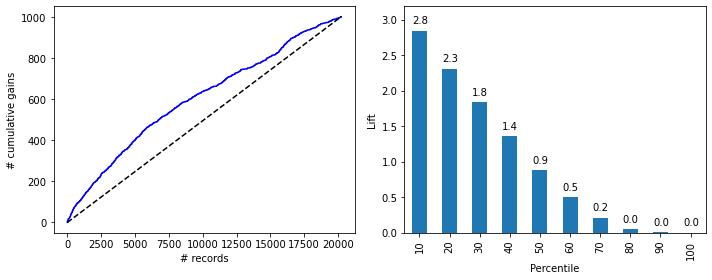

In [474]:
# Develop and display Gains chart and Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df1 = log_result.sort_values(by=['p(1)'], ascending=False)

# Create a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
# In the Gains chart, the 'lift' over the base curve 
# indicates for a given number of cases (on x-axis), 
# the additional responders that you can identify 
# by using the logistic regression model.
gainsChart(df1.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 1's' 
# yields 7.8 times as many 1's as would simply selecting 
# 10% of the records at random.
liftChart(df1['p(1)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()

In [475]:
# Same initial preprocessing and creating dummies.

# Create a data frame for statsmodels package. 
#bank_df_sm = bank_df 

# Add constant column.
#bank_df_sm = sm.add_constant(bank_df_sm, prepend=True)

# Create predictors X and output variable y.   
#X = bank_df_sm.drop(columns=['Personal_Loan'])
#y = bank_df_sm['Personal_Loan']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Use GLM (generalized linear model) with the binomial family 
# to fit a logistic regression.
log_reg_sm = sm.GLM(train_y, train_X, family=sm.families.Binomial())
log_result_sm = log_reg_sm.fit()
print(log_result_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                30360
Model:                            GLM   Df Residuals:                    30288
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5523.7
Date:                Sun, 14 May 2023   Deviance:                       11047.
Time:                        21:04:23   Pearson chi2:                 5.00e+04
No. Iterations:                   100   Pseudo R-squ. (CS):            0.01538
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
age               

In [476]:
df

,age,year,month,day,hour,minute,volume,high,low,close,...,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET,company_ordinal
0,21.0,2021,11,10,15,30,1276090,6168.00,5.9100,5.91,...,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0,1.0
1,22.0,2021,11,9,15,30,2271889,6.20,5.8000,6.06,...,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0,1.0
2,23.0,2021,11,8,15,30,1670784,6.34,6.0600,6.10,...,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0,1.0
3,24.0,2021,11,5,14,30,4124330,6.74,6.1500,6.21,...,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0,1.0
4,25.0,2021,11,4,14,30,1129657,7.21,7005.0000,7.03,...,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50596,25.0,2021,11,4,14,30,611227,17.48,16.9300,17.42,...,770000.0,90000.0,523543.0,-4.430101e+08,9.428079e+08,18.0,18.0,1.1053,0.0,390.0
50597,26.0,2021,11,3,14,30,502608,17.36,16.5300,17.13,...,790000.0,130000.0,548269.0,-1.486834e+09,-6.112662e+08,18.0,18.0,0.8534,0.0,390.0
50598,27.0,2021,11,2,14,30,333168,16.99,16394.0000,16.61,...,800000.0,120000.0,550260.4,5.045461e+08,2.482484e+08,18.0,18.0,0.5436,0.0,390.0
50599,28.0,2021,11,1,14,30,497027,17.15,16.4101,16.79,...,800000.0,90000.0,553638.5,-4.123012e+08,1.168218e+09,18.0,18.0,0.8148,0.0,390.0


In [477]:
# # Confusion matrices for multiple predictors logistic model. 

# # Identify and display confusion matrix for training partition. 
# print('Training Partition')
# classificationSummary(train_y, log_reg.predict(train_X))

# # Identify and display confusion matrix for validation partition. 
# print()
# print('Validation Partition')
# classificationSummary(valid_y, log_reg.predict(valid_X))

In [ ]:
## backward elimination 


# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: age, year, month, day, hour, minute, volume, high, low, close, open, AVERAGE_SMA_3_CLOSE, EMA_3_CLOSE, MACD_3_CLOSE, AVERAGE_SMA_3_OPENHIGH, EMA_3_OPENHIGH, MACD_3_OPENHIGH, AVERAGE_SMA_3_HIGHLOW, EMA_3_HIGHLOW, MACD_3_HIGHLOW, AVERAGE_SMA_3_VOLUME, EMA_3_VOLUME, MACD_3_VOLUME, AVERAGE_SMA_4_CLOSE, EMA_4_CLOSE, MACD_4_CLOSE, AVERAGE_SMA_4_OPENHIGH, EMA_4_OPENHIGH, MACD_4_OPENHIGH, AVERAGE_SMA_4_HIGHLOW, EMA_4_HIGHLOW, MACD_4_HIGHLOW, AVERAGE_SMA_4_VOLUME, EMA_4_VOLUME, MACD_4_VOLUME, AVERAGE_SMA_7_CLOSE, EMA_7_CLOSE, MACD_7_CLOSE, AVERAGE_SMA_7_OPENHIGH, EMA_7_OPENHIGH, MACD_7_OPENHIGH, AVERAGE_SMA_7_HIGHLOW, EMA_7_HIGHLOW, MACD_7_HIGHLOW, AVERAGE_SMA_7_VOLUME, EMA_7_VOLUME, MACD_7_VOLUME, AVERAGE_SMA_20_CLOSE, EMA_20_CLOSE, MACD_20_CLOSE, AVERAGE_SMA_20_OPENHIGH, EMA_20_OPENHIGH, MACD_20_OPENHIGH, AVERAGE_SMA_20_HIGHLOW, EMA_20_HIGHLOW, MACD_20_HIGHLOW, AVERAGE_SMA_20_VOLUME, EMA_20_VOLUME, MACD_20_VOLUME, AVERAGE_SMA_50_CLOSE, EMA_50_CLOSE, MACD_50_CLOSE, AVERAGE_SMA_50_OP

In [ ]:
# Develop the multiple linear regression model based
# on the Backward Elimination results.

# Identify predictors and outcome of the regression model.
predictors_be = ['age', 'hour', 'volume', 'AVERAGE_SMA_3_CLOSE', 'EMA_3_HIGHLOW', 'MACD_7_HIGHLOW', 'EMA_20_CLOSE', 'MACD_20_CLOSE', 'AVERAGE_SMA_20_OPENHIGH', 'EMA_20_OPENHIGH', 'AVERAGE_SMA_20_HIGHLOW', 'EMA_20_HIGHLOW', 'MACD_20_HIGHLOW', 'MACD_20_VOLUME', 'AVERAGE_SMA_50_CLOSE', 'MACD_50_CLOSE', 'EMA_50_OPENHIGH', 'MACD_50_OPENHIGH', 'EMA_50_HIGHLOW', 'MACD_50_HIGHLOW', 'MACD_50_VOLUME', 'DINAMIC3', 'company_ordinal']
outcome = 'TARGET'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = df[predictors_be]
y = df[outcome]
train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
df_be = LinearRegression()
df_be.fit(train_X_be, train_y_be)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Backward Elimination')
print()
print('Intercept ', np.round(df_be.intercept_, 6))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(df_be.coef_, 6)}))


In [ ]:
# # Use predict() to score predictions for validation set in
# # regression model based Backward Elimination algorithm.
# df_be_pred = df_be.predict(valid_X_be)

# # Develop and display data frame with actual values of Price,
# # scoring (predicted) results, and residuals.
# # Use round() function to round vlaues in data frame to 
# # 2 decimals. 
# result = round(pd.DataFrame({'Actual': valid_y_be,'Predicted': df_be_pred, 
#                        'Residual': valid_y_be - df_be_pred}), 2)
# print()
# print('Predictions for Validation Set Using Backward Elimination')
# print(result.head(10))

# # Display common accuracy measures for validation set.
# print()
# print('Accuracy Measures for Validation Set Using Backward Elimination')
# regressionSummary(valid_y_be, df_be_pred)

In [ ]:
# # Confusion matrices for backward elimimination regression  model. 

# # Identify and display confusion matrix for training partition. 
# print('Training Partition')
# classificationSummary(train_y, df_be.predict(train_X_be))

# # Identify and display confusion matrix for validation partition. 
# print()
# print('Validation Partition')
# classificationSummary(valid_y, df_be.predict(valid_X_be))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate predictions for the training partition
train_pred_be = df_be.predict(train_X_be)

# Calculate and display evaluation metrics for the training partition
print('Training Partition')
train_mse_be = mean_squared_error(train_y_be, train_pred_be)
train_rmse_be = np.sqrt(train_mse_be)
train_mae_be = mean_absolute_error(train_y_be, train_pred_be)
train_r2_be = r2_score(train_y_be, train_pred_be)

print(f'Mean Squared Error (MSE): {train_mse_be:.4f}')
print(f'Root Mean Squared Error (RMSE): {train_rmse_be:.4f}')
print(f'Mean Absolute Error (MAE): {train_mae_be:.4f}')
print(f'R-squared (R2): {train_r2_be:.4f}')

# Calculate predictions for the validation partition
valid_pred_be = df_be.predict(valid_X_be)

# Calculate and display evaluation metrics for the validation partition
print('Validation Partition')
valid_mse_be = mean_squared_error(valid_y_be, valid_pred_be)
valid_rmse_be = np.sqrt(valid_mse_be)
valid_mae_be = mean_absolute_error(valid_y_be, valid_pred_be)
valid_r2_be = r2_score(valid_y_be, valid_pred_be)

print(f'Mean Squared Error (MSE): {valid_mse_be:.4f}')
print(f'Root Mean Squared Error (RMSE): {valid_rmse_be:.4f}')
print(f'Mean Absolute Error (MAE): {valid_mae_be:.4f}')
print(f'R-squared (R2): {valid_r2_be:.4f}')


In [ ]:
# import numpy as np

# # Get the target variable
# target = np.array(df['TARGET'])

# # Set the threshold value
# threshold = 0.5

# # Convert the target variable to a binary variable
# binary_target = np.where(target > threshold, 1, 0)

# print(binary_target)

In [ ]:
# # Confusion matrices for backward elimimination regression  model. 

# # Identify and display confusion matrix for training partition. 
# print('Training Partition')
# classificationSummary(train_y_be, df_be.predict(train_X_be))

# # Identify and display confusion matrix for validation partition. 
# print()
# print('Validation Partition')
# classificationSummary(valid_y_be, df_be.predict(valid_X_be))

In [ ]:
# import numpy as np

# # Get the target variable
# target = np.array(df['TARGET'])

# # Get the predicted values
# predicted_values = np.array(df['TARGET'])

# # Calculate the MSE
# mse = np.mean((target - predicted_values)**2)

# print(mse)

In [ ]:
#LOGISTIC REGRESSION


# Create predictors X and outcome y variables.
X_be = df.drop(columns=['TARGET'])
y_be = df['TARGET']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X_be, valid_X_be, train_y_be, valid_y_be = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg_be = LogisticRegression(max_iter=1000)

log_reg_be = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg_be.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg_be.intercept_[0], decimals=10))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg_be.coef_[0], decimals=10)}, 
                    index=X.columns).transpose())

# logit = -12.105 - 0.052*Age + 0.053*Experience + ... + 4.359*Education_Advanced/Professional